In [51]:
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
import pandas as pd

def read_metrics_csv(filepath):
    with open(filepath) as f:
        lines = f.readlines()

    # Get model and timestamp from the first line
    model_line = lines[0].strip().replace("Metrics for ", "")
    model, timestamp = model_line.split(" at ")

    # Read optimizer and momentum from lines 1 and 2
    optimizer = lines[1].split(",")[1].strip()
    momentum = float(lines[2].split(",")[1].strip())

    # Hyperparameters (after "Hyperparameters" header on line 3)
    hyperparams = {}
    for line in lines[4:8]:  # Lines 4–7 contain hyperparameters
        key, val = line.strip().split(",")
        hyperparams[key] = float(val) if "." in val else int(val)

    # Read the actual metrics into a DataFrame (starting from line 8)
    df = pd.read_csv(filepath, skiprows=8)

    # Combine everything into one metadata dict
    metadata = {
        "model": model,
        "timestamp": timestamp,
        "optimizer": optimizer,
        "momentum": momentum,
        **hyperparams
    }

    return metadata, df

# Read metrics for old csv format (without optimizer)
def read_metrics_old_csv(filepath):
    with open(filepath) as f:
        lines = f.readlines()

    # Get model and timestamp from the first line
    model_line = lines[0].strip().replace("Metrics for ", "")
    model, timestamp = model_line.split(" at ")

    # Read metadata from known line positions

    # Hyperparameters (lines 4–7)
    hyperparams = {}
    for line in lines[2:6]:
        key, val = line.strip().split(",")
        hyperparams[key] = float(val) if "." in val else int(val)

    # Read the actual metrics into a DataFrame (starting from line 8)
    df = pd.read_csv(filepath, skiprows=7)

    # Combine everything into one metadata dict
    metadata = {
        "model": model,
        "timestamp": timestamp,
        **hyperparams
    }

    return metadata, df

def read_metrics_adam_csv(filepath):
    with open(filepath) as f:
        lines = f.readlines()

    # Get model and timestamp from the first line
    model_line = lines[0].strip().replace("Metrics for ", "")
    model, timestamp = model_line.split(" at ")

    # Read metadata from known line positions
    optimizer = lines[1].split(",")[1].strip()

    # Hyperparameters (lines 4–7)
    hyperparams = {}
    for line in lines[3:7]:
        key, val = line.strip().split(",")
        hyperparams[key] = float(val) if "." in val else int(val)

    # Read the actual metrics into a DataFrame (starting from line 8)
    df = pd.read_csv(filepath, skiprows=8)

    # Combine everything into one metadata dict
    metadata = {
        "model": model,
        "timestamp": timestamp,
        "optimizer": optimizer,
        **hyperparams
    }


    return metadata, df


# One plot for each LR with train and test loss & acc.
def plot_single_lr(meta, df):
    df = df.dropna()

    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Plot loss on primary y-axis (left)
    ax1.plot(df.epoch, df.train_loss, label='Train Loss', color='tab:blue')
    ax1.plot(df.epoch, df.test_loss, label='Test Loss', color='tab:cyan')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (Cross Entropy)')
    ax1.tick_params(axis='y')
    ax1.grid(True)

    # Create secondary y-axis (right) for accuracy
    ax2 = ax1.twinx()
    ax2.plot(df.epoch, df.train_acc, label='Train Acc', color='tab:orange')
    ax2.plot(df.epoch, df.test_acc, label='Test Acc', color='tab:red')
    ax2.set_ylabel('Accuracy')
    ax2.tick_params(axis='y')

    # Combine legends from both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='center right')

    plt.title(
        f"ViT - LR: {meta['learning_rate']} - Optimizer: SGD - Momentum: 0.0 - Batch size: {meta['batch_size']}")
    plt.tight_layout()
    plt.show()

# Plot one plot for all different LR runs, specify quantity wanted (i.e. test acc, etc.)
def plot_comp_lr(quantity, lr):
    for item in lr: 
        meta, df = read_metrics_old_csv(f"../outputs_vit/csv/{lr[item]}")
        df = df.dropna()

        plt.plot(df['epoch'],df[quantity], label = item)
    plt.xlabel('Epoch')
    plt.ylabel(f'{quantity}')
    plt.title(
    f"ViT - Optimizer: SGD - Momentum: 0.0 - Batch size: {meta['batch_size']}")
    plt.legend()
    plt.tight_layout()
    plt.grid()
    plt.show()

# One plot for each momentum with train and test loss & acc.
def plot_single_mom(meta, df):
    df = df.dropna()

    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Plot loss on primary y-axis (left)
    ax1.plot(df.epoch, df.train_loss, label='Train Loss', color='tab:blue')
    ax1.plot(df.epoch, df.test_loss, label='Test Loss', color='tab:cyan')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (Cross Entropy)')
    ax1.tick_params(axis='y')
    ax1.grid(True)

    # Create secondary y-axis (right) for accuracy
    ax2 = ax1.twinx()
    ax2.plot(df.epoch, df.train_acc, label='Train Acc', color='tab:orange')
    ax2.plot(df.epoch, df.test_acc, label='Test Acc', color='tab:red')
    ax2.set_ylabel('Accuracy')
    ax2.tick_params(axis='y')

    # Combine legends from both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='center right')

    plt.title(
        f"ViT - LR: {meta['learning_rate']} - "
        f"Optimizer: {meta['optimizer']}{' - Momentum: ' + str(meta['momentum']) if meta['optimizer'] == 'sgd' else ''}"
        f" - Batch size: {meta['batch_size']}")
    plt.tight_layout()
    plt.show()


# Plot one plot for all different momentum runs, specify quantity wanted (i.e. test acc, etc.)
def plot_comp_momentum(quantity, momentum):
    for item in momentum: 
        meta, df = read_metrics_csv(f"../outputs_vit/csv/{momentum[item]}")
        df = df.dropna()

        plt.plot(df['epoch'],df[quantity], label = item)
    plt.xlabel('Epoch')
    plt.ylabel(f'{quantity}')
    plt.title(
    f"ViT - LR: {meta['learning_rate']} - "
    f"Optimizer: {meta['optimizer']} - Batch size: {meta['batch_size']}")
    plt.legend()
    plt.tight_layout()
    plt.grid()
    plt.show()


def plot_single_batch(meta, df):
    df = df.dropna()

    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Plot loss on primary y-axis (left)
    ax1.plot(df.epoch, df.train_loss, label='Train Loss', color='tab:blue')
    ax1.plot(df.epoch, df.test_loss, label='Test Loss', color='tab:cyan')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (Cross Entropy)')
    ax1.tick_params(axis='y')
    ax1.grid(True)

    # Create secondary y-axis (right) for accuracy
    ax2 = ax1.twinx()
    ax2.plot(df.epoch, df.train_acc, label='Train Acc', color='tab:orange')
    ax2.plot(df.epoch, df.test_acc, label='Test Acc', color='tab:red')
    ax2.set_ylabel('Accuracy')
    ax2.tick_params(axis='y')

    # Combine legends from both axes
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='center right')

    plt.title(
        f"ViT - LR: {meta['learning_rate']} - Optimizer: Adam - Batch size: {meta['batch_size']}")
    plt.tight_layout()
    plt.show()

def plot_comp_batch(quantity, batch):
    for item in batch: 
        meta, df = read_metrics_adam_csv(f"../outputs_vit/csv/{batch[item]}")
        df = df.dropna()

        plt.plot(df['epoch'],df[quantity], label = item)
    plt.xlabel('Epoch')
    plt.ylabel(f'{quantity}')
    plt.title(f'ViT - Optimizer: Adam')
    #plt.title(
    #f"ViT - LR: {meta['learning_rate']} - "
    #f"Optimizer: Adam")
    plt.legend()
    plt.tight_layout()
    plt.grid()
    plt.show()

## Learning Rate

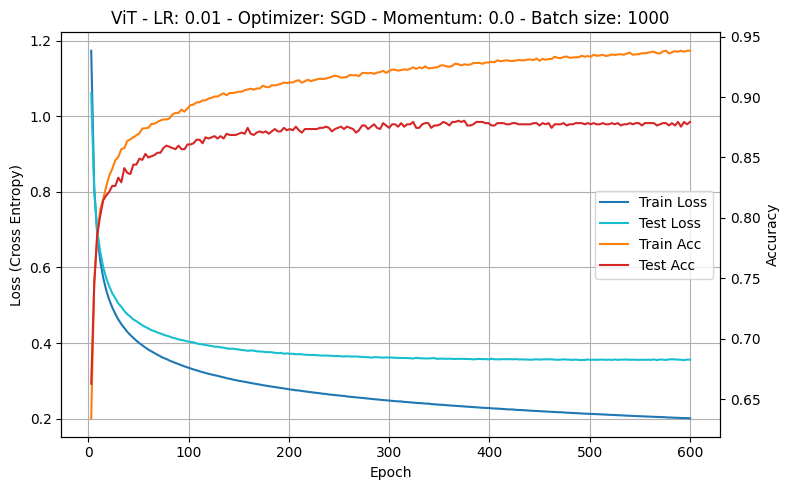

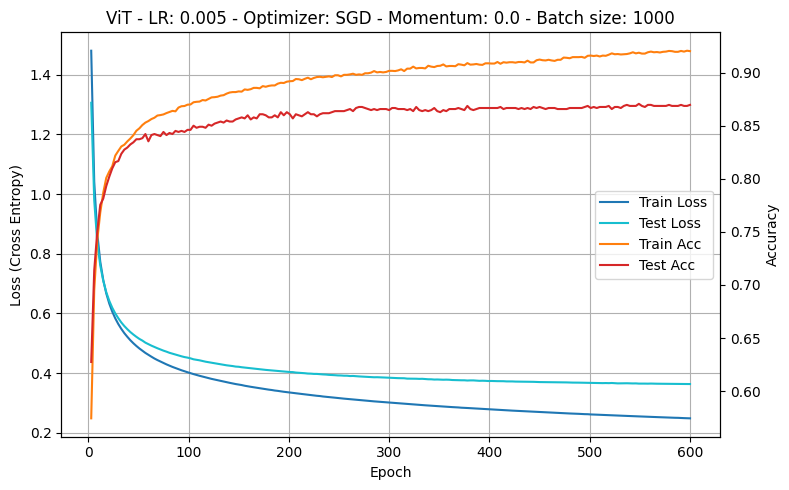

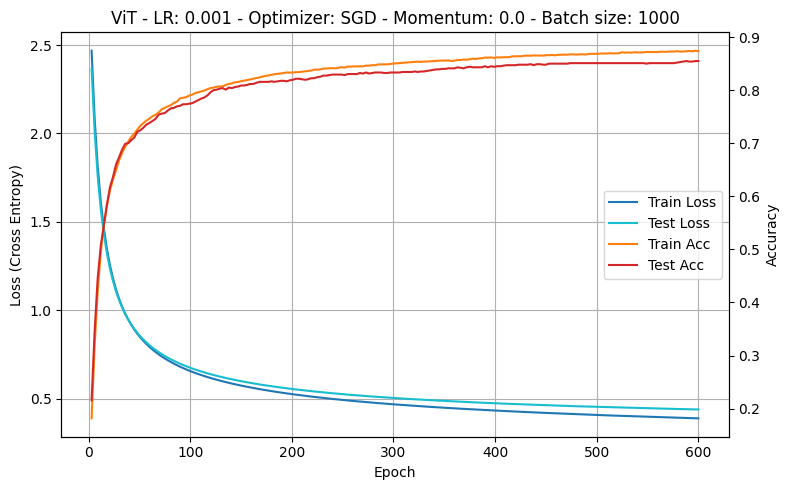

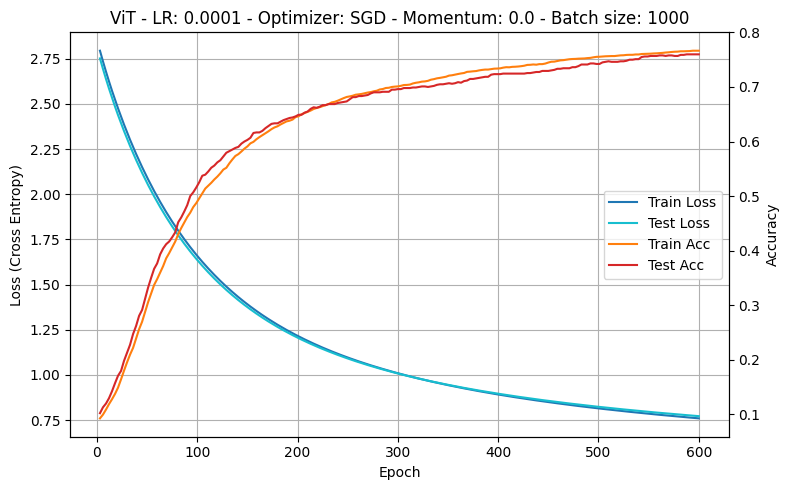

In [53]:
# Only 30 epochs
# d01 =  pd.read_csv('C:/Users/Farmer/Desktop/FarmersEye/farmers-eye-pytorch/outputs_vit/csv/metrics_20250625_011530_vit_base_patch16_224.csv', skiprows=7)
# d001 = pd.read_csv('C:/Users/Farmer/Desktop/FarmersEye/farmers-eye-pytorch/outputs_vit/csv/metrics_20250625_001202_vit_base_patch16_224.csv', skiprows=7)
# d0001 = pd.read_csv('C:/Users/Farmer/Desktop/FarmersEye/farmers-eye-pytorch/outputs_vit/csv/metrics_20250625_012818_vit_base_patch16_224.csv', skiprows=7)
# d00001 = pd.read_csv('C:/Users/Farmer/Desktop/FarmersEye/farmers-eye-pytorch/outputs_vit/csv/metrics_20250625_014457_vit_base_patch16_224.csv', skiprows=7)


# 600 epochs
lr = {
    '0.01' : 'metrics_20250625_033820_vit_base_patch16_224.csv',
    '0.005' : 'metrics_20250625_050825_vit_base_patch16_224.csv',
    '0.001' : 'metrics_20250625_063841_vit_base_patch16_224.csv',
    '0.0001' : 'metrics_20250625_080903_vit_base_patch16_224.csv'
}


for item in lr:
    meta, df = read_metrics_old_csv(f"../outputs_vit/csv/{lr[item]}")
    plot_single_lr(meta, df)




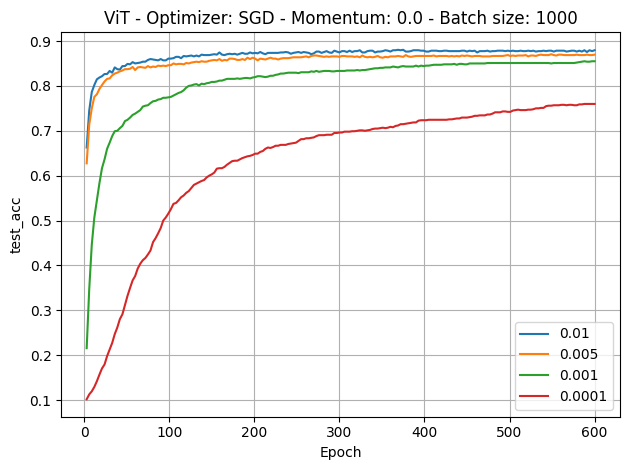

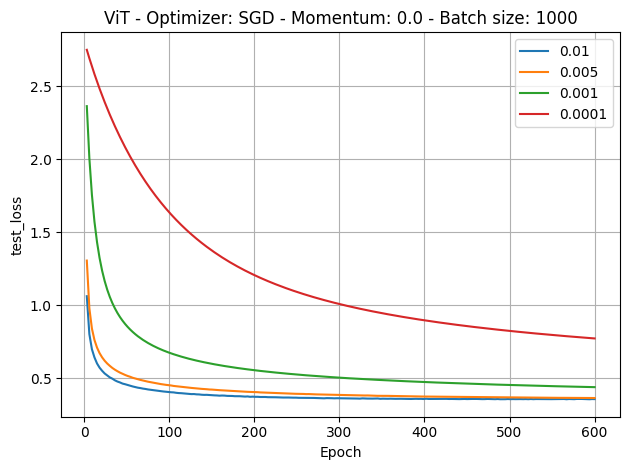

In [54]:
plot_comp_lr('test_acc', lr)
plot_comp_lr('test_loss', lr)

## Momentum

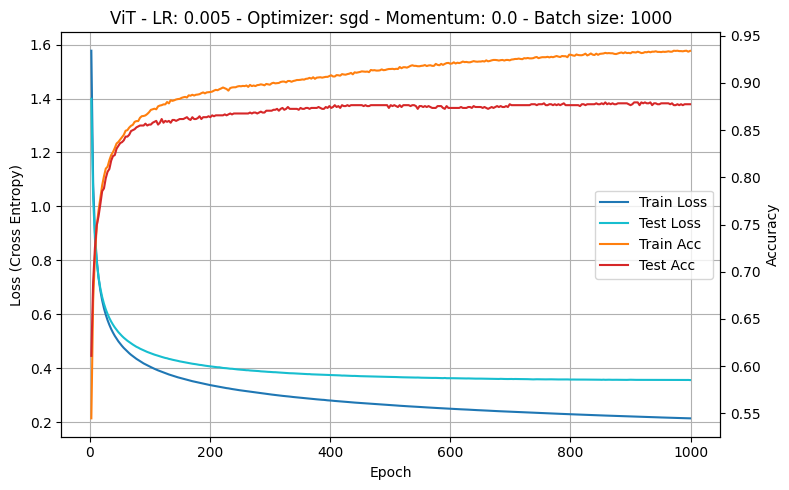

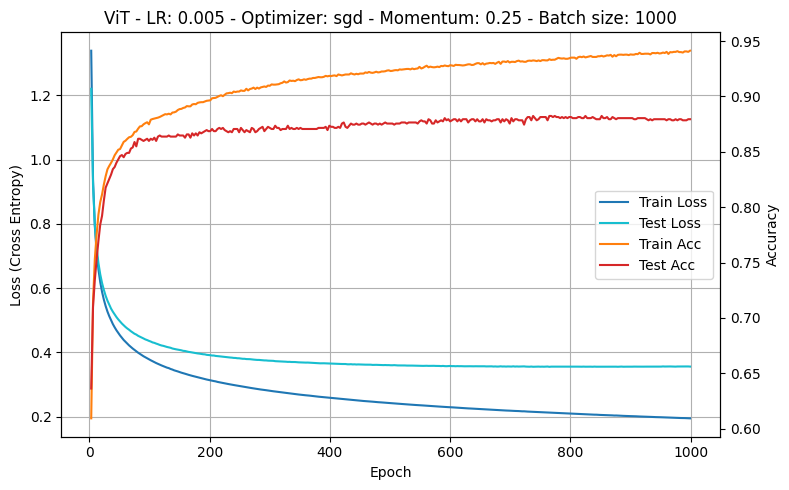

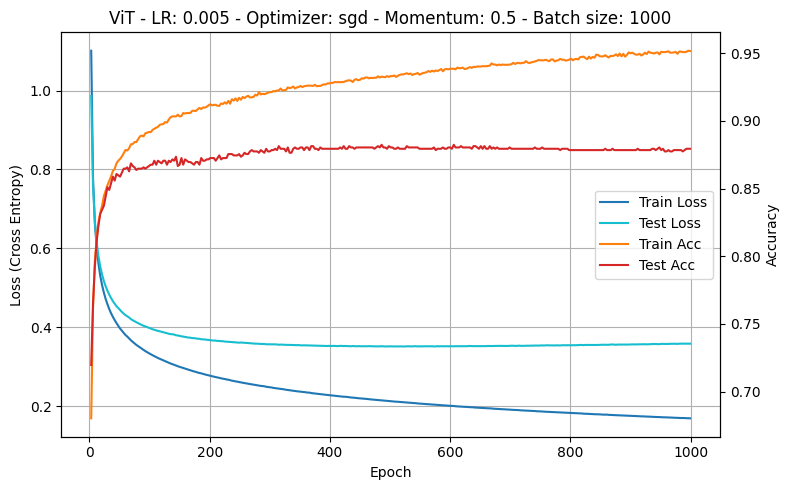

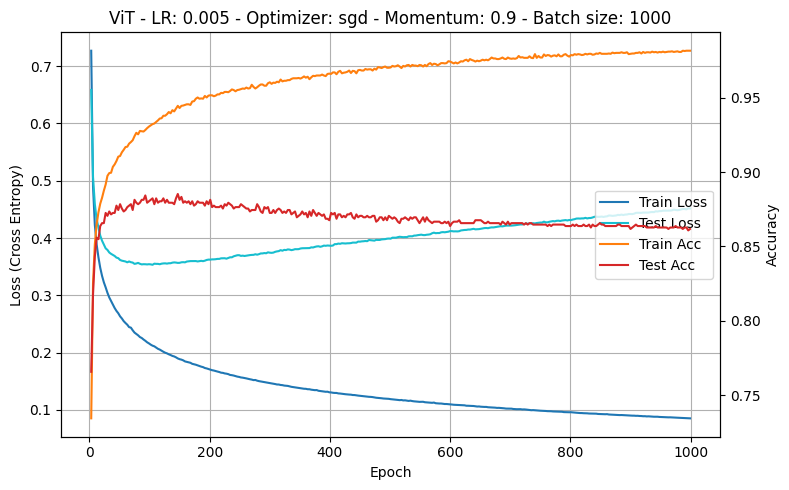

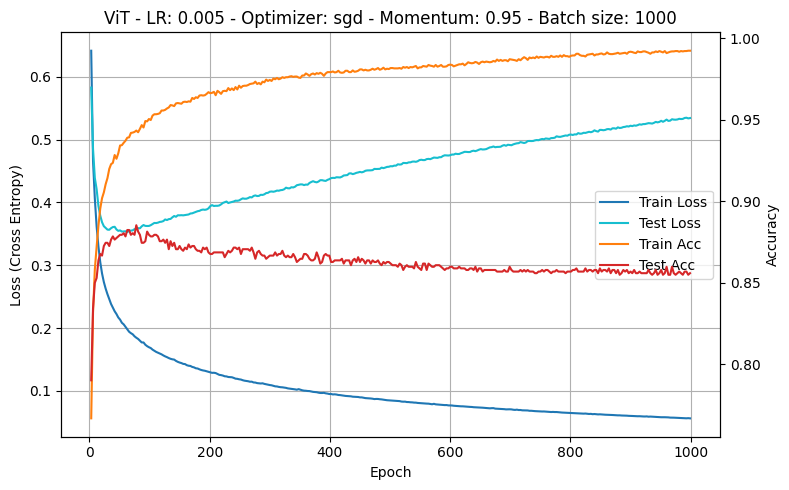

In [55]:
momentum = {
    'm_0' : 'metrics_20250630_013628_vit_base_patch16_224.csv',
    'm_25' : 'metrics_20250630_040700_vit_base_patch16_224.csv',
    'm_50' : 'metrics_20250630_063640_vit_base_patch16_224.csv',
    'm_90' : 'metrics_20250630_091410_vit_base_patch16_224.csv',
    'm_99' : 'metrics_20250630_114203_vit_base_patch16_224.csv'
}


for item in momentum:
    meta, df = read_metrics_csv(f"../outputs_vit/csv/{momentum[item]}")
    plot_single_mom(meta,df)


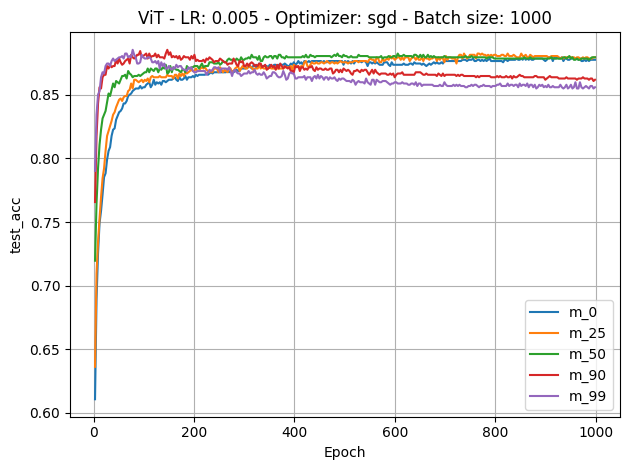

In [56]:
plot_comp_momentum('test_acc', momentum)

## Adam vs. SGD

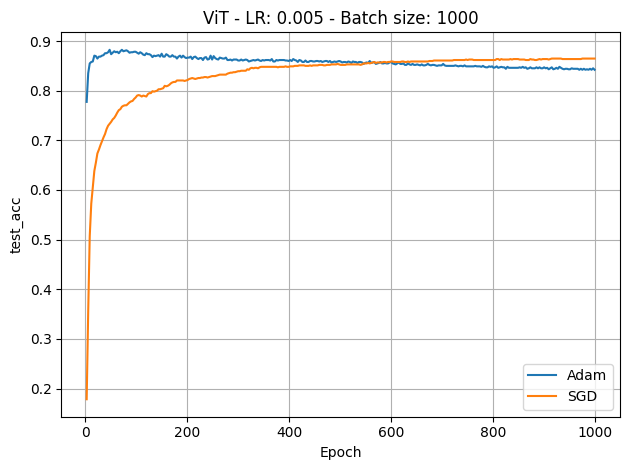

In [57]:
opt = {
    'sgd' : 'metrics_20250630_175645_vit_base_patch16_224.csv',
    'adam' : 'metrics_20250630_202854_vit_base_patch16_224.csv'
}


meta_adam, df_adam = read_metrics_adam_csv(f"../outputs_vit/csv/{opt['adam']}")
meta_sgd, df_sgd = read_metrics_csv(f"../outputs_vit/csv/{opt['sgd']}")
quantity = "test_acc"

df_adam = df_adam.dropna()
df_sgd = df_sgd.dropna()

plt.plot(df_adam['epoch'],df_adam[quantity], label = "Adam")
plt.plot(df_sgd['epoch'], df_sgd[quantity], label = 'SGD')
plt.xlabel('Epoch')
plt.ylabel(f'{quantity}')
plt.title(f"ViT - LR: {meta['learning_rate']} - Batch size: {meta['batch_size']}")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

## Batch size

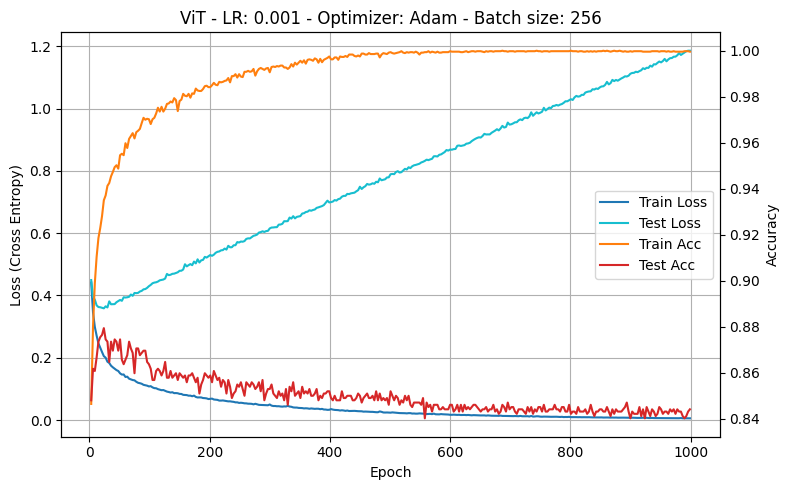

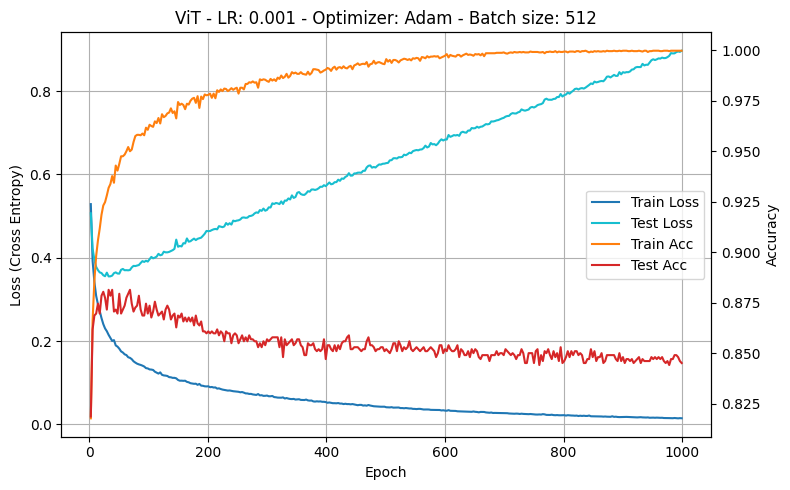

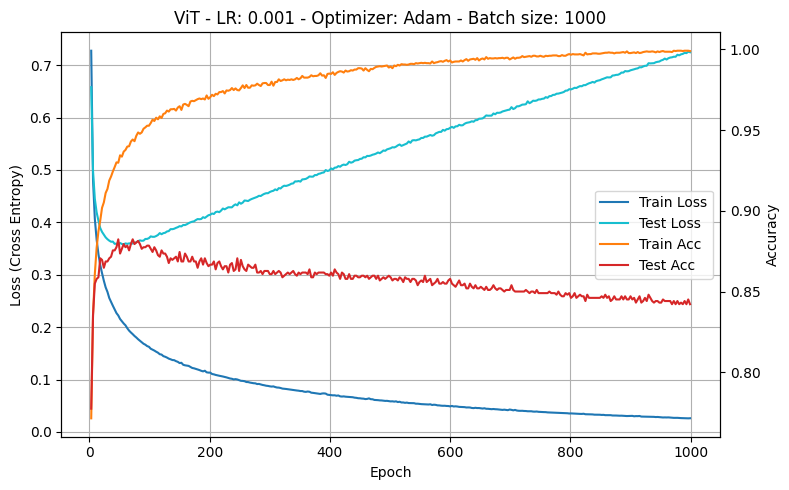

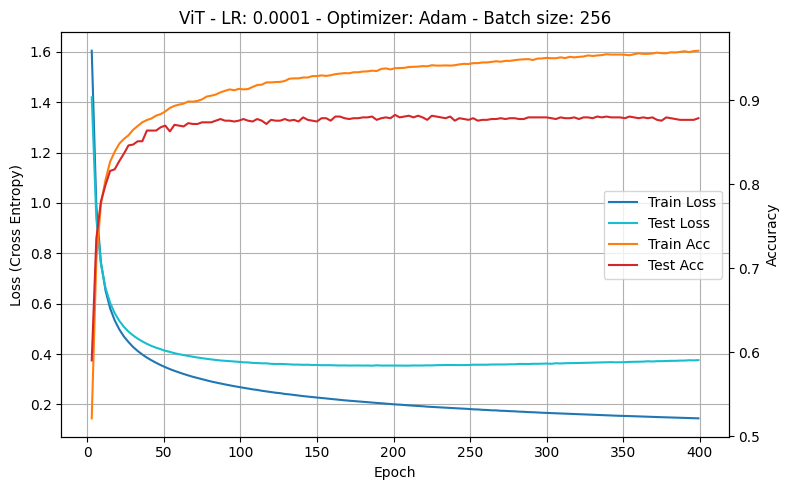

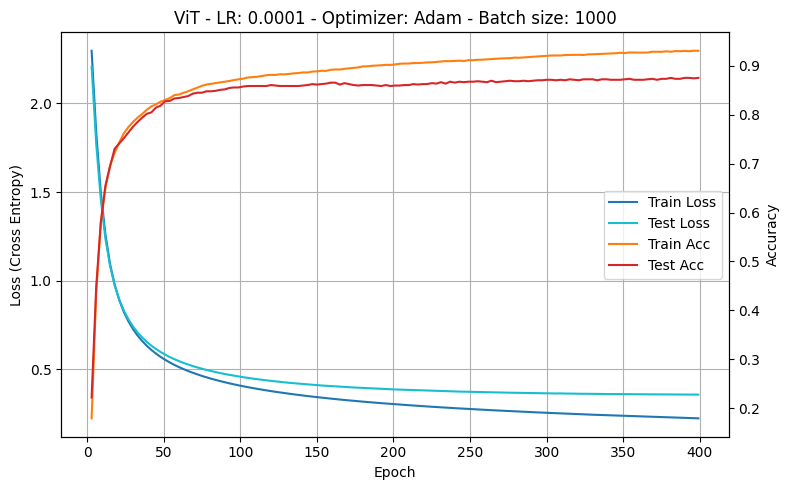

In [58]:
batch = {
    '256 - LR=0.001' : 'metrics_20250701_024505_vit_base_patch16_224.csv', 
    '512 - LR=0.001' : 'metrics_20250701_051642_vit_base_patch16_224.csv',
    '1000 - LR=0.001' : 'metrics_20250630_202854_vit_base_patch16_224.csv',
    '256 - LR=0.0001' : 'metrics_20250701_110232_vit_base_patch16_224.csv',
    '1000 - LR=0.0001' : 'metrics_20250701_125256_vit_base_patch16_224.csv'
}

for item in batch:
    meta, df = read_metrics_adam_csv(f"../outputs_vit/csv/{batch[item]}")
    plot_single_batch(meta,df)


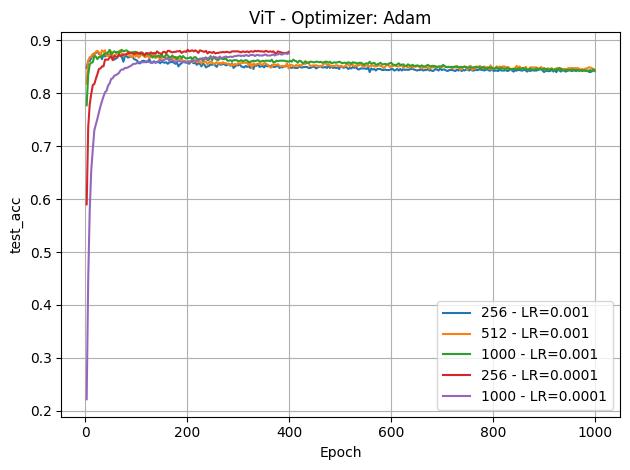

In [59]:
plot_comp_batch('test_acc', batch)

In [60]:
# Accuracy and loss

df = d001
df1 = d0005
df2 = d0001
df3 = d00001

df_test = df.dropna()
df1_test = df1.dropna()
df2_test = df2.dropna()
df3_test = df3.dropna()


fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns

# First plot
axes[0].plot(df['epoch'], df['train_loss'], label='Train Loss')
axes[0].plot(df_test['epoch'], df_test['test_loss'], label='Test Loss')
axes[0].set_title('Cross Entropy Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Second plot
axes[1].plot(df['epoch'], df['train_acc'], label='Train Accuracy')
axes[1].plot(df_test['epoch'], df_test['test_acc'], label='Test Accuracy')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.title
plt.show() 



NameError: name 'd001' is not defined

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns

# First plot
axes[0].plot(df['epoch'], df['train_loss'], label= '0.01')
axes[0].plot(df1['epoch'], df1['train_loss'], label='0.005')
axes[0].plot(df2['epoch'], df2['train_loss'], label='0.001')
axes[0].plot(df3['epoch'], df3['train_loss'], label='0.0001')
axes[0].set_title('Train Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Second plot
axes[1].plot(df_test['epoch'], df_test['test_loss'], label='0.01')
axes[1].plot(df1_test['epoch'], df1_test['test_loss'], label='0.005')
axes[1].plot(df2_test['epoch'], df2_test['test_loss'], label='0.001')
axes[1].plot(df3_test['epoch'], df3_test['test_loss'], label='0.0001')
axes[1].set_title('Test Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.title
plt.show() 

In [ ]:
plt.plot(df2_test["epoch"],df2_test["best_test_acc"], label='0.001')
plt.plot(df1_test["epoch"],df1_test["best_test_acc"], label='0.005')
plt.title("Best test accuracy")
plt.legend()
plt.show()